In [67]:
from scipy.constants import G
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import numpy as np
from scipy.constants import G, kilo, mega

In [70]:
M = 5.972e24  # Masa de la Tierra en kg
R_T = 6371 * kilo  # Radio de la Tierra en metros
r_orbit = 3000 * kilo  # Altitud del satélite en metros

In [93]:
r0 = R_T + r_orbit

v_t = np.sqrt(G * M / r0) # velocidad tangencial para mantener una órbita circular (sale de hacer un balance entre la Fg y mv^2 / r)

r_initial = r0
theta_initial = 0 # Da igual ya que es circular
radial_velocity_initial = 0 # dr/dt = 0
angular_velocity_initial = v_t / r0  # v = w * r

initial_conditions = [r_initial, theta_initial, radial_velocity_initial, angular_velocity_initial]


def lagrange(t, y):
    r, theta, dr_dt, dtheta_dt = y
    
    # Aceleración radial (segunda derivada de r)
    d2r_dt2 = r * dtheta_dt**2 - G * M / r**2
    
    # Aceleración angular (segunda derivada de theta)
    d2theta_dt2 = -2 * dr_dt * dtheta_dt / r

    return [dr_dt, dtheta_dt, d2r_dt2, 0]  # dtheta/dt no cambia en órbita circular



In [95]:
# Tiempo de simulación (10,000 segundos)
t_span = (0, 10000)
t_eval = np.linspace(t_span[0], t_span[1], 1000)

solution = solve_ivp(lagrange, t_span, initial_conditions, t_eval=t_eval, method='RK45')

r = solution.y[0]  # Distancia radial
theta = solution.y[1]  # Ángulo

# Convertir a coordenadas cartesianas para graficar
x = r * np.cos(theta)
y = r * np.sin(theta)



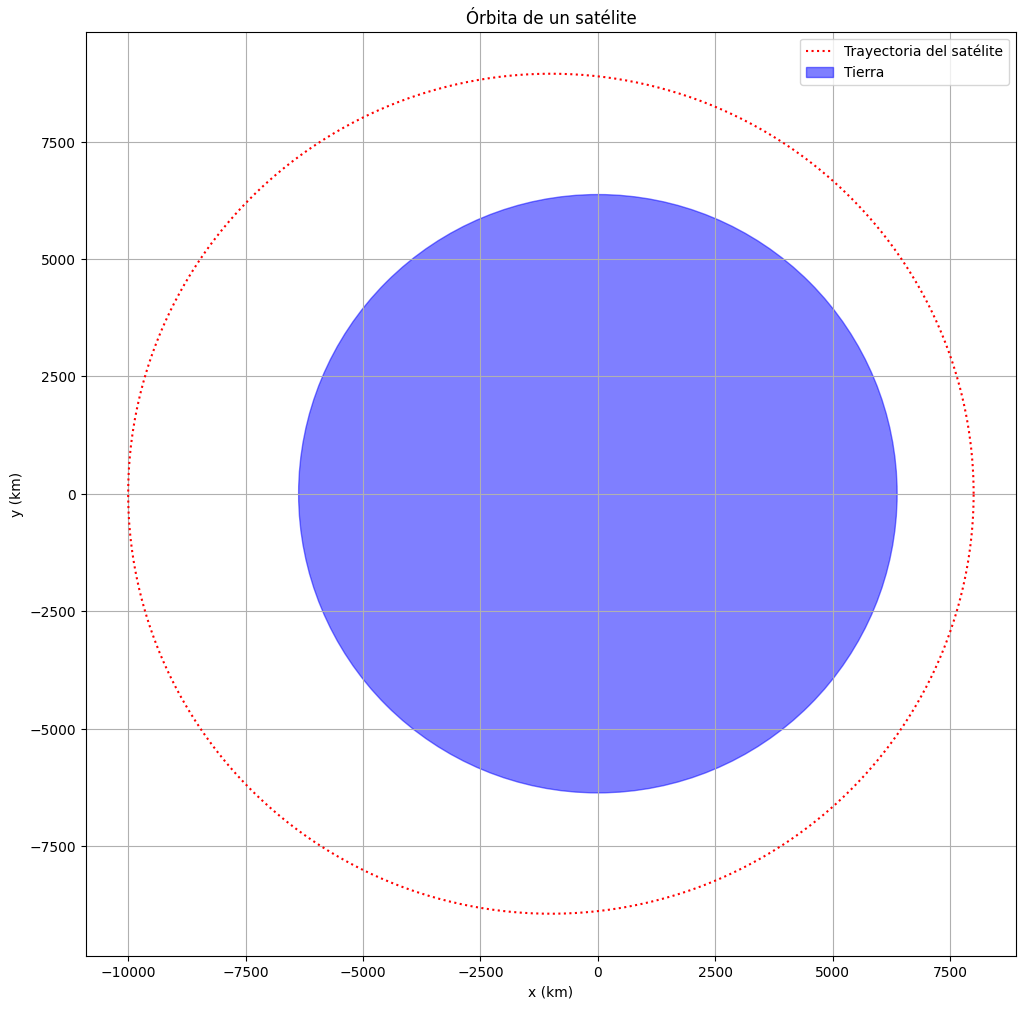

In [185]:
# Graficar la trayectoria orbital
plt.figure(figsize=(12, 12))
plt.plot(x / kilo, y / kilo, label='Trayectoria del satélite', linestyle="dotted", color="red")  # Convertir metros a km

# Dibujar la Tierra
earth = plt.Circle((0, 0), R_T / kilo, color='blue', label='Tierra', alpha=0.5)
plt.gca().add_artist(earth)

# Configurar el gráfico
plt.title('Órbita de un satélite')
plt.xlabel('x (km)')
plt.ylabel('y (km)')
plt.axis('equal')
plt.grid()
plt.legend()
plt.show()


### ¿Qué sucede si definimos una velocidad menor?

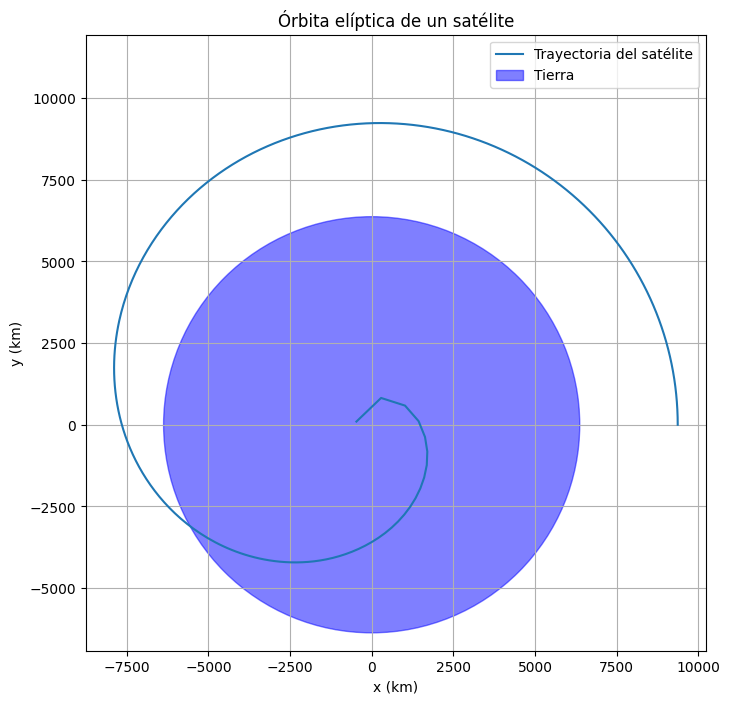

In [101]:
altitud = 3000 * kilo  # Altitud del satélite en metros

# Distancia total al centro de la Tierra
r0 = R_T + altitud  # en metros

# Velocidad tangencial inicial ajustada para órbita elíptica
# Asumimos una velocidad inicial en una órbita elíptica, puede ser un valor arbitrario
v_t = 6500  # m/s (velocidad tangencial inicial, se puede ajustar)

# Condiciones iniciales
r_initial = r0
theta_initial = 0
radial_velocity_initial = 0  # Velocidad radial inicial (en una órbita elíptica no es cero)
angular_velocity_initial = v_t / r0  # Velocidad angular inicial

# Vector de condiciones iniciales
initial_conditions = [r_initial, theta_initial, radial_velocity_initial, angular_velocity_initial]

# Conservación del momento angular
L = r_initial**2 * angular_velocity_initial  # Momento angular

# Ecuaciones de movimiento para órbita elíptica
def equations_of_motion(t, y):
    r, theta, dr_dt, dtheta_dt = y
    
    # Ecuación radial
    d2r_dt2 = r * dtheta_dt**2 - G * M / r**2
    
    # Ecuación angular (conservación del momento angular)
    dtheta_dt = L / (r**2)  # dtheta/dt no cambia en órbita elíptica
    
    return [dr_dt, dtheta_dt, d2r_dt2, 0]  # La velocidad angular no cambia en este modelo

# Tiempo de simulación (10,000 segundos)
t_span = (0, 6000)
t_eval = np.linspace(t_span[0], t_span[1], 500)

# Resolviendo las ecuaciones de movimiento
solution = solve_ivp(equations_of_motion, t_span, initial_conditions, t_eval=t_eval, method='RK45')

# Extrayendo soluciones
r = solution.y[0]  # Distancia radial
theta = solution.y[1]  # Ángulo

# Convertir a coordenadas cartesianas para graficar
x = r * np.cos(theta)
y = r * np.sin(theta)

# Graficar la trayectoria orbital
plt.figure(figsize=(8, 8))
plt.plot(x / 1e3, y / 1e3, label='Trayectoria del satélite')  # Convertir metros a km

# Dibujar la Tierra
earth = plt.Circle((0, 0), R_T / 1e3, color='blue', label='Tierra', alpha=0.5)
plt.gca().add_artist(earth)

# Configurar el gráfico
plt.title('Órbita elíptica de un satélite')
plt.xlabel('x (km)')
plt.ylabel('y (km)')
plt.axis('equal')
plt.grid()
plt.legend()
plt.show()

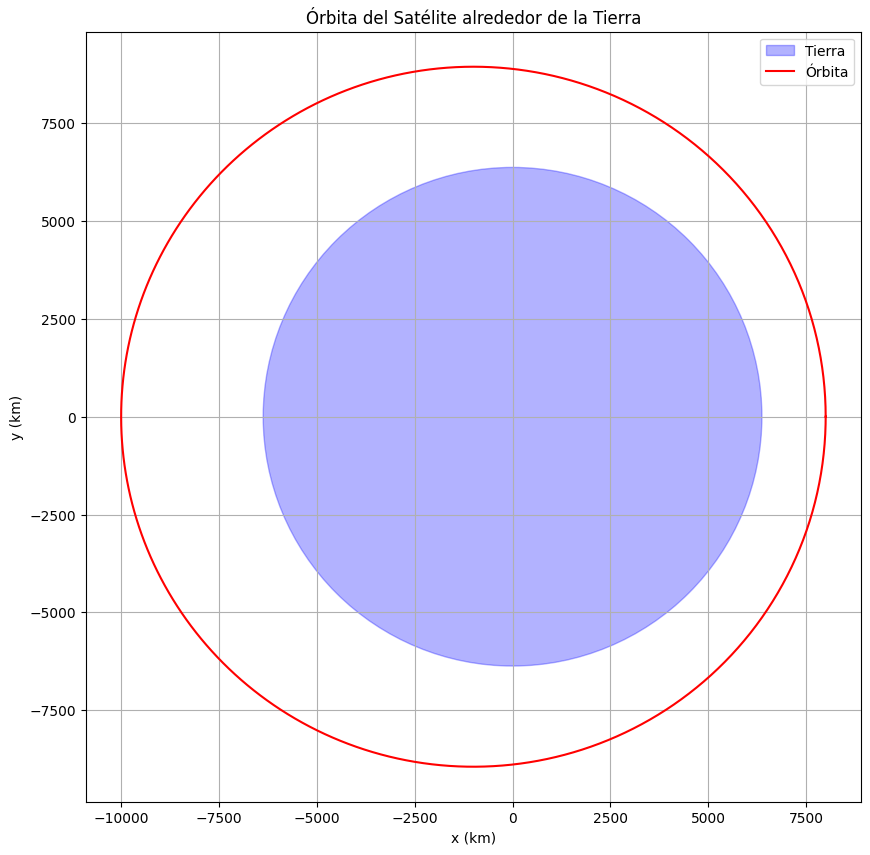

Altura en perigeo: 1629.00 km
Altura en apogeo: 3629.00 km
Período orbital: 2.36 horas


In [187]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constantes físicas
G = 6.67430e-11  # Constante gravitacional universal
M = 5.972e24     # Masa de la Tierra
kilo = 1000      

# Ajustamos los parámetros orbitales para una órbita más estable
r_a = 10000 * kilo  # Apogeo 
r_p = 8000 * kilo  # Perigeo (mayor que el radio de la Tierra ~6371 km)

a = (r_a + r_p) / 2
e = (r_a - r_p) / (r_a + r_p)

# Condiciones iniciales
r_initial = r_p
theta_initial = 0
v_p = np.sqrt(G * M * (2 / r_initial - 1 / a))  # Velocidad en el perigeo
radial_initial_v = 0
v_tangential_initial = v_p

# Momento angular específico
L = r_initial * v_tangential_initial

initial_conditions = [r_initial, theta_initial, radial_initial_v, v_tangential_initial / r_initial]

def equations_of_motion(t, y):
    r, theta, dr_dt, dtheta_dt = y
    d2r_dt2 = r * dtheta_dt**2 - G * M / r**2
    d2theta_dt2 = -2 * dr_dt * dtheta_dt / r
    return [dr_dt, dtheta_dt, d2r_dt2, d2theta_dt2]

T = 2 * np.pi * np.sqrt(a**3 / (G * M))
t_span = (0, T)
t_eval = np.linspace(t_span[0], t_span[1], 1000)

solution = solve_ivp(equations_of_motion, t_span, initial_conditions, 
                    t_eval=t_eval, method='RK45', rtol=1e-8, atol=1e-8)

t = solution.t
r = solution.y[0]
theta = solution.y[1]

x = r * np.cos(theta)
y = r * np.sin(theta)

# Dibujamos la Tierra y la órbita
plt.figure(figsize=(10, 10))
earth_radius = 6371 * kilo  # Radio de la Tierra
circle = plt.Circle((0, 0), earth_radius/1000, color='blue', alpha=0.3, label='Tierra')
plt.gca().add_patch(circle)

plt.plot(x/1000, y/1000, 'r-', label='Órbita')
plt.xlabel('x (km)')
plt.ylabel('y (km)')
plt.title('Órbita del Satélite alrededor de la Tierra')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()

print(f"Altura en perigeo: {(r_p - earth_radius)/1000:.2f} km")
print(f"Altura en apogeo: {(r_a - earth_radius)/1000:.2f} km")
print(f"Período orbital: {T/3600:.2f} horas")

In [192]:
import numpy as np
from scipy.integrate import solve_ivp
import plotly.graph_objects as go

# Constantes físicas
G = 6.67430e-11
M = 5.972e24
kilo = 1000
earth_radius = 6371 * kilo  # Radio de la Tierra en metros

# Parámetros orbitales
r_a = 10000 * kilo
r_p = 8600 * kilo
a = (r_a + r_p) / 2
e = (r_a - r_p) / (r_a + r_p)

# Condiciones iniciales
r_initial = r_p
theta_initial = 0
v_p = np.sqrt(G * M * (2 / r_initial - 1 / a))
radial_initial_v = 0
v_tangential_initial = v_p

initial_conditions = [r_initial, theta_initial, radial_initial_v, v_tangential_initial / r_initial]

def equations_of_motion(t, y):
    r, theta, dr_dt, dtheta_dt = y
    d2r_dt2 = r * dtheta_dt**2 - G * M / r**2
    d2theta_dt2 = -2 * dr_dt * dtheta_dt / r
    return [dr_dt, dtheta_dt, d2r_dt2, d2theta_dt2]

# Crear círculo para la Tierra con más puntos
theta_earth = np.linspace(0, 2*np.pi, 200)
x_earth = (earth_radius/1000) * np.cos(theta_earth)
y_earth = (earth_radius/1000) * np.sin(theta_earth)

T = 2 * np.pi * np.sqrt(a**3 / (G * M))
t_span = (0, T)
t_eval = np.linspace(t_span[0], t_span[1], 300)

solution = solve_ivp(equations_of_motion, t_span, initial_conditions, 
                    t_eval=t_eval, method='RK45', rtol=1e-8, atol=1e-8)

t = solution.t
r = solution.y[0]
theta = solution.y[1]

x = r * np.cos(theta)
y = r * np.sin(theta)

# Crear la animación con Plotly
frames = []
for i in range(len(t)):
    frame = go.Frame(
        data=[
            # Tierra (estática)
            go.Scatter(x=x_earth, y=y_earth, 
                      fill="toself", 
                      fillcolor='rgba(0, 87, 183, 0.7)',  # Azul más oscuro y opaco
                      line=dict(color='blue', width=2),
                      name='Tierra'),
            # Trayectoria
            go.Scatter(x=x[:i+1]/1000, y=y[:i+1]/1000, 
                      mode='lines', 
                      line=dict(color='red', width=2), 
                      name='Trayectoria'),
            # Satélite
            go.Scatter(x=[x[i]/1000], y=[y[i]/1000], 
                      mode='markers', 
                      marker=dict(color='yellow', size=15, symbol='star'), 
                      name='Satélite')
        ],
        name=str(i)
    )
    frames.append(frame)

# Configuración de la figura
fig = go.Figure(
    data=[
        # Tierra
        go.Scatter(x=x_earth, y=y_earth, 
                  fill="toself", 
                  fillcolor='rgba(0, 87, 183, 0.7)',  # Azul más oscuro y opaco
                  line=dict(color='blue', width=2),
                  name='Tierra'),
        # Órbita completa
        go.Scatter(x=x/1000, y=y/1000, 
                  mode='lines', 
                  line=dict(color='red', width=2), 
                  name='Órbita completa'),
        # Satélite inicial
        go.Scatter(x=[x[0]/1000], y=[y[0]/1000], 
                  mode='markers', 
                  marker=dict(color='yellow', size=15, symbol='star'), 
                  name='Satélite')
    ],
    layout=go.Layout(
        title='Órbita del Satélite alrededor de la Tierra',
        plot_bgcolor='black',  # Fondo negro
        paper_bgcolor='black',  # Fondo del papel negro
        font=dict(color='white'),  # Texto en blanco
        xaxis=dict(
            title='x (km)', 
            range=[-8000, 8000],
            scaleanchor="y",
            scaleratio=1,
            gridcolor='rgba(128, 128, 128, 0.2)',  # Rejilla gris tenue
            zerolinecolor='rgba(128, 128, 128, 0.2)'
        ),
        yaxis=dict(
            title='y (km)', 
            range=[-8000, 8000],
            gridcolor='rgba(128, 128, 128, 0.2)',  # Rejilla gris tenue
            zerolinecolor='rgba(128, 128, 128, 0.2)'
        ),
        showlegend=True,
        legend=dict(
            font=dict(color='white'),
            bgcolor='rgba(0,0,0,0.5)'
        ),
        updatemenus=[
            dict(
                type='buttons',
                font=dict(color='black'),
                bgcolor='white',
                showactive=False,
                buttons=[
                    dict(label='Play',
                         method='animate',
                         args=[None, dict(frame=dict(duration=30, redraw=True),
                                        fromcurrent=True)]),
                    dict(label='Pause',
                         method='animate',
                         args=[[None], dict(frame=dict(duration=0, redraw=False),
                                          mode='immediate')])
                ]
            )
        ]
    ),
    frames=frames
)

# Guardar la animación como HTML
fig.write_html("orbita_plotly_mejorada.html")
print("Animación interactiva creada y guardada como 'orbita_plotly_mejorada.html'")
print("Período orbital:", T/3600, "horas")

Animación interactiva creada y guardada como 'orbita_plotly_mejorada.html'
Período orbital: 2.4793567955719666 horas
